<a href="https://colab.research.google.com/github/FlaviaNdr/Python_Projects/blob/main/FlightDelays2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of flights delays in 2021**

The Dataset includes all flight delays for the past year. The dataset can be downloaded from the Bureau of Transportation Statistics (https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

# 1.Import Libraries and Data

In [105]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

In [106]:
# Import Dataset')
df = pd.read_csv('https://raw.githubusercontent.com/FlaviaNdr/Python_Projects/main/Airline_Delay_Cause.csv')

# 2.Data exploration and cleaning

Check the data

In [107]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,2.51,0.00,...,0.0,2.95,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0
1,2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.02,0.00,...,0.0,1.87,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0
2,2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,2.63,0.00,...,0.0,1.15,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0
3,2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,8.53,3.25,...,0.0,2.74,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0
4,2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,3.15,1.88,...,0.0,0.82,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0


In [108]:
df.shape 

(19954, 21)

In [109]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [110]:
# renaming columns
df.columns=['Year','Month','Carrier','Carrier Name','Airport','Airport Name','No Arrived Flights','No Delayed Arrivals','No Carrier Del','No Weather Del','No Nas Del','No Security Del','No Late Aircraft Del','No Arrivals Cancelled','No Arrivals Diverted', 'Arrival Delay','Carrier Delay','Weather Delay','Nas Delay','Security delay','Late Aircraft Delay']


In [111]:
df.describe()

,Year,Month,No Arrived Flights,No Delayed Arrivals,No Carrier Del,No Weather Del,No Nas Del,No Security Del,No Late Aircraft Del,No Arrivals Cancelled,No Arrivals Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security delay,Late Aircraft Delay
count,19954.0,19954.00000,19932.000000,19929.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.00000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000,19932.000000
mean,2021.0,6.63486,300.792545,50.696573,19.768108,2.219045,12.394351,0.235887,16.07160,5.170580,0.708258,3342.028447,1364.502960,229.781407,558.403321,11.338551,1178.001204
std,0.0,3.42493,837.504976,145.076311,52.783468,7.854232,42.663588,1.037067,54.31714,24.742801,3.355977,10515.311519,4296.182353,902.669264,2193.915997,60.179166,4108.819770
min,2021.0,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,4.00000,40.000000,5.000000,2.000000,0.000000,0.380000,0.000000,0.86000,0.000000,0.000000,254.000000,86.000000,0.000000,14.000000,0.000000,28.000000
50%,2021.0,7.00000,88.000000,13.000000,5.195000,0.260000,2.570000,0.000000,3.00000,1.000000,0.000000,768.000000,294.000000,14.000000,93.000000,0.000000,190.000000
75%,2021.0,10.00000,210.000000,35.000000,15.000000,1.770000,7.952500,0.000000,9.77000,3.000000,0.000000,2189.250000,968.000000,138.000000,310.000000,0.000000,707.250000
max,2021.0,12.00000,17547.000000,3402.000000,1147.000000,226.000000,908.110000,41.970000,1531.81000,1036.000000,154.000000,305694.000000,111645.000000,27876.000000,63629.000000,3760.000000,143192.000000


Above table shows mean, median, standard deviaiton, quartiles and maximum of each columns in the dataframe.

In [112]:
df.dtypes

Year                       int64
Month                      int64
Carrier                   object
Carrier Name              object
Airport                   object
Airport Name              object
No Arrived Flights       float64
No Delayed Arrivals      float64
No Carrier Del           float64
No Weather Del           float64
No Nas Del               float64
No Security Del          float64
No Late Aircraft Del     float64
No Arrivals Cancelled    float64
No Arrivals Diverted     float64
Arrival Delay            float64
Carrier Delay            float64
Weather Delay            float64
Nas Delay                float64
Security delay           float64
Late Aircraft Delay      float64
dtype: object

In [113]:
df = df.drop_duplicates()
df.shape # no dublicates found

(19954, 21)

Check and drop missing values

In [114]:
# check missing values
df.isnull().values.any()

True

In [115]:
df.isna().sum()

Year                      0
Month                     0
Carrier                   0
Carrier Name              0
Airport                   0
Airport Name              0
No Arrived Flights       22
No Delayed Arrivals      25
No Carrier Del           22
No Weather Del           22
No Nas Del               22
No Security Del          22
No Late Aircraft Del     22
No Arrivals Cancelled    22
No Arrivals Diverted     22
Arrival Delay            22
Carrier Delay            22
Weather Delay            22
Nas Delay                22
Security delay           22
Late Aircraft Delay      22
dtype: int64

We have mising data in 15 columns. The number of missing data is similar so they are in the same rows. Lets drop them

In [116]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

Year                     0
Month                    0
Carrier                  0
Carrier Name             0
Airport                  0
Airport Name             0
No Arrived Flights       0
No Delayed Arrivals      0
No Carrier Del           0
No Weather Del           0
No Nas Del               0
No Security Del          0
No Late Aircraft Del     0
No Arrivals Cancelled    0
No Arrivals Diverted     0
Arrival Delay            0
Carrier Delay            0
Weather Delay            0
Nas Delay                0
Security delay           0
Late Aircraft Delay      0
dtype: int64

In [117]:
# round the numbers
df.round()

,Year,Month,Carrier,Carrier Name,Airport,Airport Name,No Arrived Flights,No Delayed Arrivals,No Carrier Del,No Weather Del,...,No Security Del,No Late Aircraft Del,No Arrivals Cancelled,No Arrivals Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security delay,Late Aircraft Delay
0,2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,3.0,0.0,...,0.0,3.0,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0
1,2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.0,0.0,...,0.0,2.0,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0
2,2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,3.0,0.0,...,0.0,1.0,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0
3,2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,9.0,3.0,...,0.0,3.0,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0
4,2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,3.0,2.0,...,0.0,1.0,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19949,2021,1,YX,Republic Airline,TLH,"Tallahassee, FL: Tallahassee International",131.0,8.0,4.0,0.0,...,0.0,1.0,1.0,2.0,582.0,328.0,0.0,178.0,0.0,76.0
19950,2021,1,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",253.0,19.0,6.0,0.0,...,0.0,5.0,2.0,0.0,1039.0,418.0,6.0,206.0,0.0,409.0
19951,2021,1,YX,Republic Airline,TUS,"Tucson, AZ: Tucson International",31.0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,191.0,0.0,0.0,191.0,0.0,0.0
19952,2021,1,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **3.Analysis**

In [118]:
df['No Arrived Flights'].sum() # Total of arrived flights

5995392.0

In [119]:
df['No Delayed Arrivals'].sum() # Total of delayed flights

1010332.0

### Which Airline has most number of delays?


In [120]:
Group = df.groupby('Carrier Name')['No Delayed Arrivals'].sum().sort_values()
x = Group.index.tolist()
y = Group.values.tolist()

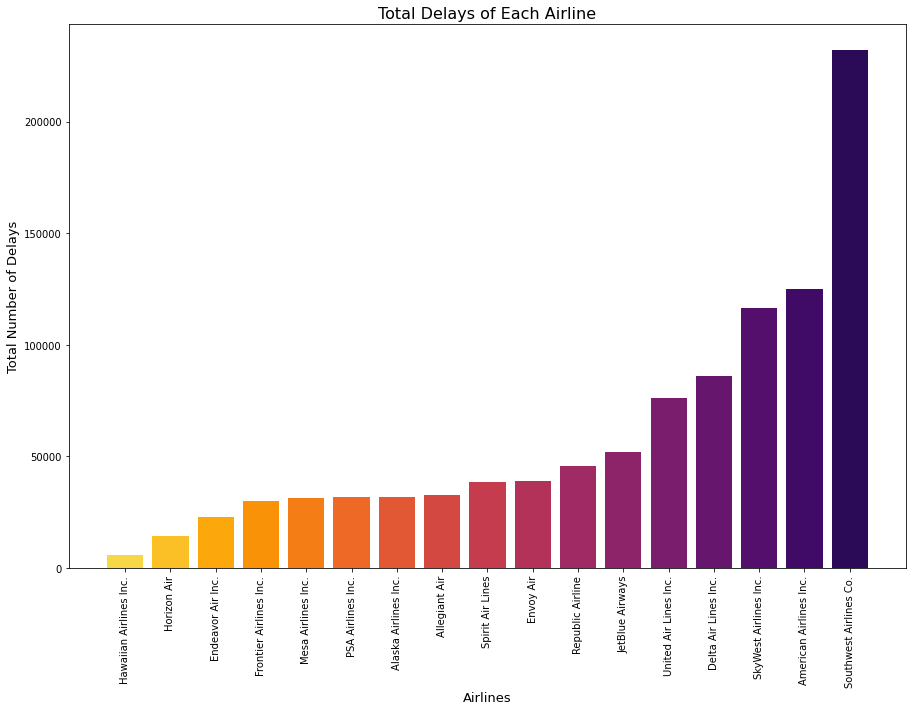

In [121]:
colors = cm.inferno_r(np.linspace(.1, .85, len(x)))
plt.figure(figsize = [15,10])
plt.bar(x,y, color = colors)
plt.xticks(rotation = 90)
plt.title("Total Delays of Each Airline", fontsize = 16)
plt.xlabel("Airlines", fontsize = 13)
plt.ylabel("Total Number of Delays", fontsize = 13)
plt.show()

Above figure depicts that the number of delays at "Southwest Airlines Co" is the highest among all available airlines in the dataset. More than 200000 flights have been delayed for more than 15 minutes. Furthermore, the figure also illustrates that the second highest number of flight delays are at "American Airlines Inc".

### Carrier With Lowest Number of Flight Delays

In [122]:
df.groupby('Carrier Name')['No Delayed Arrivals'].sum().nsmallest(3).reset_index(name='No Delays')

,Carrier Name,No Delays
0,Hawaiian Airlines Inc.,5661.0
1,Horizon Air,14185.0
2,Endeavor Air Inc.,22653.0


These three carrier have the lowest number of delays in the given dataset

### Which airport has most number of delays

### Determine the average number of delays per Airport

In [123]:
Delays = df.groupby('Airport')['No Delayed Arrivals'].sum().mean()
# Display average number of delays per airport
print('Average Number of Delays per Airport: ' + str(Delays))

Average Number of Delays per Airport: 2723.266846361186


About 2723 delays occur in each airport from the available dataset.

In [124]:
Airport_Delays = df.groupby('Airport Name')['No Delayed Arrivals'].sum().sort_values()

In [125]:
Airport_Delays

Airport Name
Fort Leonard Wood, MO: Waynesville-St. Robert Regional Forney Field        4.0
Pago Pago, TT: Pago Pago International                                     5.0
Gustavus, AK: Gustavus Airport                                             7.0
Branson, MO: Branson Airport                                              13.0
Dickinson, ND: Dickinson - Theodore Roosevelt Regional                    13.0
                                                                        ...   
Los Angeles, CA: Los Angeles International                             28669.0
Atlanta, GA: Hartsfield-Jackson Atlanta International                  35147.0
Chicago, IL: Chicago O'Hare International                              38482.0
Denver, CO: Denver International                                       47903.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International                 52065.0
Name: No Delayed Arrivals, Length: 371, dtype: float64

In [126]:
print("The most number of delays occurr at \n\n",Airport_Delays.idxmax())

The most number of delays occurr at 

 Dallas/Fort Worth, TX: Dallas/Fort Worth International


In [127]:
print("The total number of flight delays at the above airport is", int(Airport_Delays['Dallas/Fort Worth, TX: Dallas/Fort Worth International']))

The total number of flight delays at the above airport is 52065


The most number of delays occur at "Dallas/Fort Work, TX: Dallas/Fort Worth International" with 52065 in numbers.

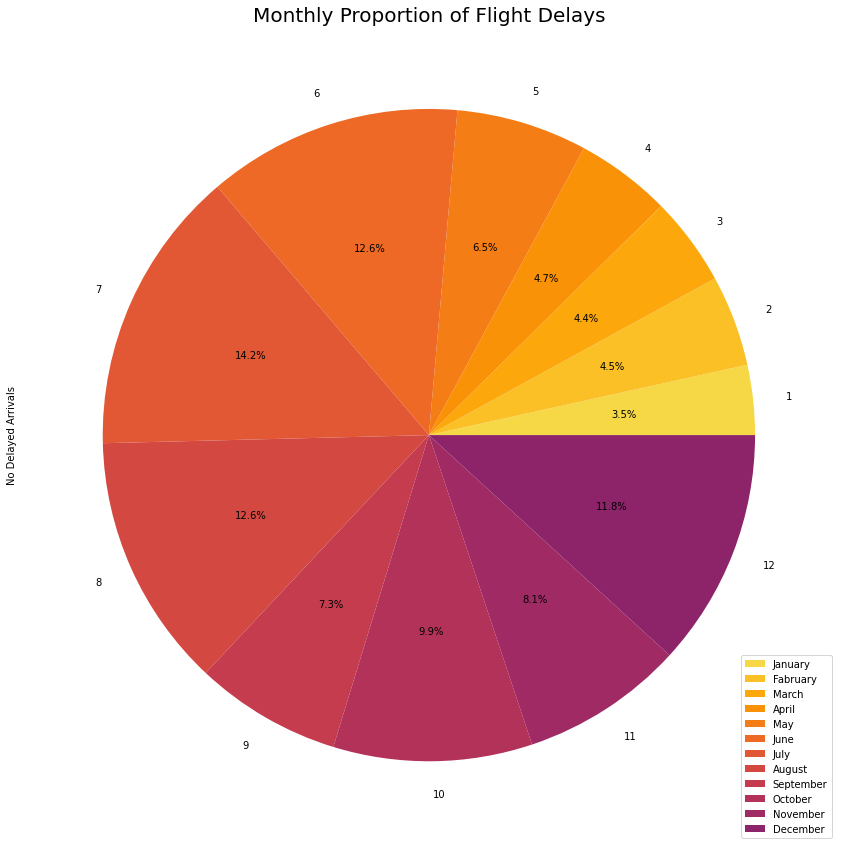

In [128]:
plt.figure(figsize = [15,15])
labels = ['January','Fabruary','March','April','May','June','July','August','September', 'October', 'November','December']
Group = df.groupby('Month')['No Delayed Arrivals'].sum().plot(kind = 'pie',autopct='%1.1f%%', colors = colors)
plt.legend(labels,loc ="lower right")
plt.title("Monthly Proportion of Flight Delays",fontsize = 20)
plt.show()

This pie chart depicts that the proportion of delays in July is 14.2% which is the highest among the all months.

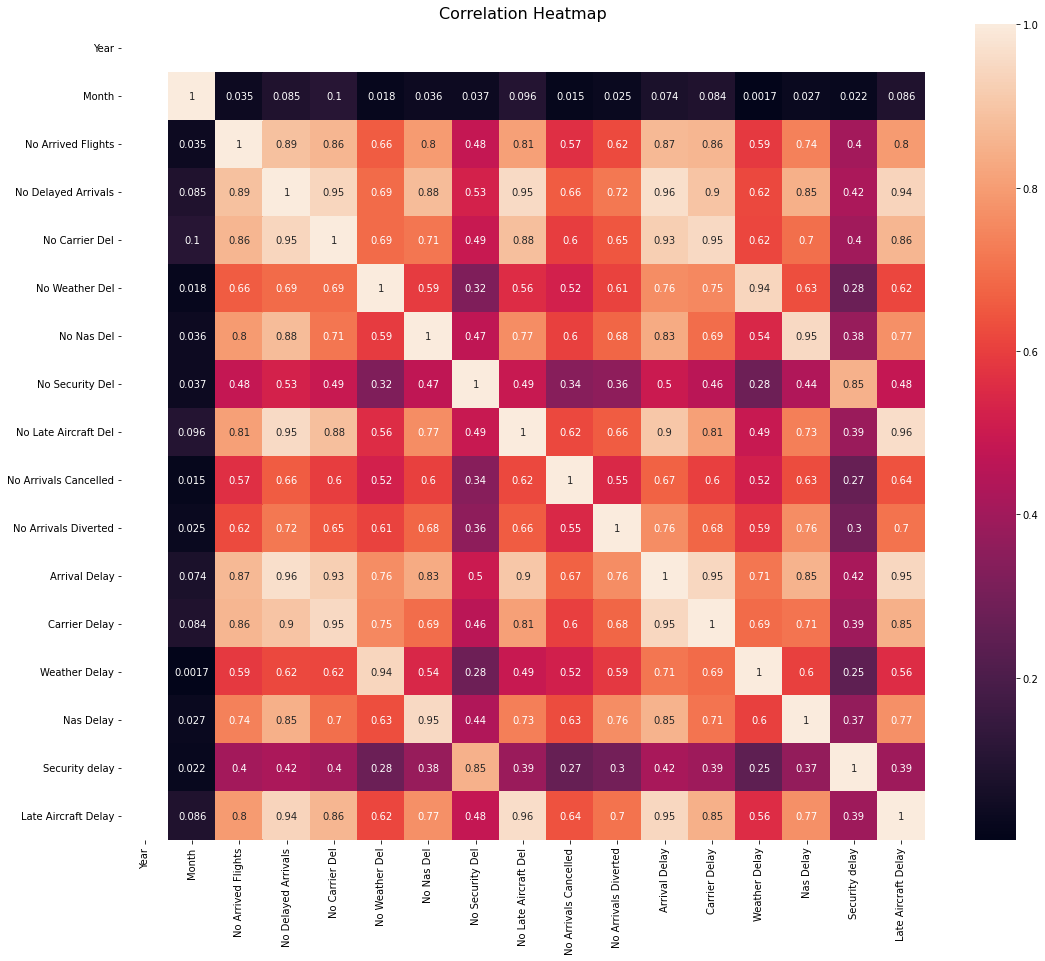

In [129]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontsize = 16)
plt.show()

Above correlation heatmap shows the correlation between all available variables in the dataset.

End of this Notebook